## Stochastics Foundations with Python


*Primary reference: 
Desmond J. Higham ["An Algorithmic Introduction to
Numerical Simulation of
Stochastic Differential
Equations"](https://epubs.siam.org/doi/10.1137/S0036144500378302)*

```
@article{higham2001,
	Author = {Desmond J. Higham},
	Title = {An Algorithmic Introduction to Numerical Simulation of Stochastic Differential Equations},
	Journal = {SIAM Rev.},
	Volume = {43},
	Number = {3},
	Pages = {525-546},
	Year = {2001}}
```

Translated to NumPy by [Pavel Mironchyk](https://www.linkedin.com/in/pavelmironchyk/?originalSubdomain=fr)

### Brownian motion

A scalar standard Brownian motion, or a standard Weiner process, over $[0,T]$ is a random variable W(t) that depends continously on $t$ that $t \in [0,T]$ and satisfies the following conditions:
1. $W(0)=0$ with probability 1
2. For $ 0 \le s \lt t \le T$ the random variable given by difference $W(t)-W(s)$ is normally distributed with mean 0 and variance $t-s$, or $W(t)-W(s) \sim \sqrt{t-s}N(0,1)$, where $N(0,1)$ is normal distribution with zero mean and unit variance.
3. $ 0 \le s \lt t \le u \lt v \le T$, the increments $ W(t) - W(s) $ and $ W(v) - W(u) $ are independent.

#### Computing discretized Brownian motion
We set $\delta t = T/N$ for some positive integer $N$ and compute and let $W_j$ denote $W(t_j)$ with $t_j=j \delta t$. Following definition $W_0 = 0$, and $W_j = W_{j-1} + dW_j$, $j = 1, 2 ... N$

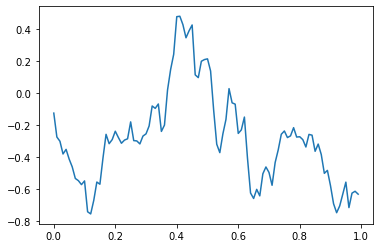

In [1]:
%matplotlib inline

import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt

N=100;
dt = 1.0 / N;
t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N);
W = np.cumsum(dW);

plt.plot(t, W);

The plot above shows a "random walk" of brownian motion. Further let's plot on single plot $M$ pathes of brownian motion.

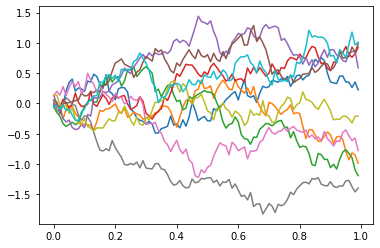

In [2]:
N=100;
M=10;
dt = 1.0 / N;
t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N,M);
W = np.cumsum(dW,axis=0);

plt.plot(t, W);

Next, let's evaluate function $u(W(t)) = exp(t + \frac{1}{2}W(t))$ along 1000 discretized motion pathes.

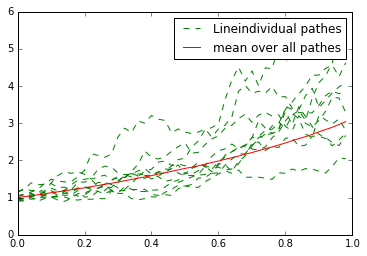

In [3]:
import numpy.matlib

N=50;
M=1000;
dt = 1.0 / N;
t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N,M);
W = np.cumsum(dW,axis=0);
t_  = np.transpose(numpy.matlib.repmat(t, M,1));
u=np.exp(t_+ 0.5*W);
u_mean = np.mean(u, axis=1);
h1 = plt.plot(t, u[:,np.arange(10,20)],'g--', label="Lineindividual pathes")[1];
h2, = plt.plot(t, u_mean, 'r-', label="mean over all pathes");
plt.legend(handles=[h1,h2]);

### Stochastic Integrals

For suitable function h, the integral $ \int_0^{T} h(t)dt $ may be approximated by Riemann sum:
$$ \sum_{j=0}^{N-1} h(t_j) (t_{j+1}-t_j) $$
where discrete points $t_j=j\delta t$. The integral may be defined by taking limit $\delta t \to 0$. In similar way we may consider the following form:
$$ \sum_{j=0}^{N-1} h(t_j) (W(t_{j+1})-W(t_j)) $$
which may be regarded as approximation to stochastic integral $ \int_0^{T} h(t)dW(t) $. Here we are integrating with respect to Brownian motion. This sum is aproximation to what is known as $It\hat{o}$ integral.

Alternatively we can  implement integral as:
$$\sum_{j=0}^{N-1}h\big(\frac{t_j+t_{j+1}}{2}\big)(W(t_{j+1})-W(t_j))$$

In case where $h(t) \equiv W(t)$, the sum above requires to be evaluated at $t=(t_{j+1}+t_j)/2$. It can be shown that forming $(W(t_j) + W(t_{j+1}))/2$ and adding independent $N(0, \Delta t /4 )$ increment, gives a value for  $(W(t_j) + W(t_{j+1}))/2$  that maintains all three conditions of Brownian motion. 
This "midpoint" sums approximates $Stratonovich$ integral.


Let's evalutate precisely the integral for the case $h(t) \equiv W(t)$ that was approximated above in two ways. The $It\hat{o}$ limiting cases is 
$$ \sum_{j=0}^{N-1} W(t_j) (W(t_{j+1})-W(t_j)) = \frac{1}{2} \sum_{j=0}^{N-1} ({W(t_{j+1})}^2 - {W(t_{j+1})}^2 + 2 W(t_j) W(t_{j+1}) - {W(t_j)}^2  - {W(t_j)}^2) =  \frac{1}{2} \sum_{j=0}^{N-1} ({W(t_{j+1})}^2 - {W(t_j)}^2 - (W(t_{j+1}) - W(t_j))^2 ) $$

$$ = \frac{1}{2} (W(T)^2 - W(0)^2)  -  \frac{1}{2} \sum_{j=0}^{N-1} (W(t_{j+1}) - W(t_j))^2 $$

The term  $\sum_{j=0}^{N-1} (W(t_{j+1}) - W(t_j))^2$ is variance of Wiener process, which is known to be T. So the value of integrals is $\frac{1}{2}(W(T)^2 - T)$

The _Stratonovich_ integrals is the limiting case of:

$$ \sum_{j=0}^{N-1} \Big(\frac{W(t_{j+1})-W(t_j)}{2} + \Delta Z_j \Big) (W(t_{j+1})-W(t_j)) $$

where each $Z_j$ is independent $N(0, \Delta t /4)$. This sum collapses to:

$$ \frac{1}{2} ( {W(T)}^2 - {W(0)}^2) +  \sum_{j=0}^{N-1} \Delta Z_j (W(t_{j+1})-W(t_j)) $$. The term $\sum_{j=0}^{N-1} \Delta Z_j (W(t_{j+1})-W(t_j))$ has expected value 0 and variance $\delta t$.
So the integral $ \int_0^{T} W(t)dW(t) = \frac{1}{2}W(T)^2 $

So let's evaluate numerically integrals with both ways and compare with theoretical results.

In [4]:
N=10000;
M=1;
T = 1.0
dt = T / N;

t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N,M);
W = np.cumsum(dW,axis=0);
e = np.array([[0]])
W_=np.concatenate((e,W[:-1]), axis=0)

ito = np.dot(W_.T,dW)
print("error ito integral = ", np.abs(ito - 0.5*(W[-1]**2 - T) )[0][0])
stratonovich = np.dot((0.5*(W_ + W) + 0.25*np.sqrt(dt)*randn(N,M)).T, dW)
print("error stratonovich = ", np.abs(stratonovich - 0.5*W[-1]**2)[0][0])

error ito integral =  0.00529472129993
error stratonovich =  0.00131061107322


### The Euler-Maruyama Method

An autonous scalar stochastic differential equation can be written in the integral form:

$$X(t)=X_0 + \int_0^t f(X(s))ds + \int_0^t g(X(s))dW(s), 0 \le t \le T$$

Here, $f$ and $g$ are scalar functions and initial condition X_0 is random variable. Here we take $It\hat{o}$ version of integral. The solutio $X(t)$ is a random variable for each t.

It is common to write this integral solution in differential form:

$$dX(t)=f(X(t))dt + g(X(t))dW(t), X(0)=X_0, 0 \le t \le T $$

Let's solve this equation numerically. We begin with discretising interval $[0,T]$. So let $\Delta t = T/L$ for some positive integer $L$, and $\tau_j = j \Delta t$. Also let denote $X_j = X(\tau_j)$. The Euler-Maruyama (EM) method takes the form:

$$X_j = X_{j-1} +f(X_{j-1}) \Delta t + g(X_{j-1})(W(\tau_j) - W(\tau_{j-1})), j=1,2...L $$

Which is straightforward approach similar to Euler method for ODE.
So let's apply this method to the most fundamental SDE in financial mathematics - Black-Scholes linear SDE:

$$dX(t)=\lambda X(t)dt + \mu X(t)DW(t), X(0)=X_0$$

Here $\lambda$ and $\mu$ are constants. For this SDE there is the exact solution:
$$X(t)=X(0)e^{(\lambda - \frac{1}{2}\mu^2)t + \mu W(t)}$$


0.370669563816


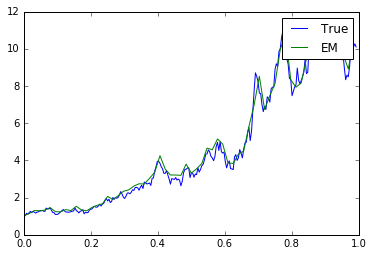

In [5]:
lambda_ = 2
mu = 1
Xzero = 1

T = 1
N = 2**8
dt = 1/N

t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N);
W = np.cumsum(dW);

Xtrue = Xzero*np.exp(((lambda_ - 0.5*mu**2)*t[1:])+(mu*W[:-1])) # true solution

R = 4
Dt = R*dt
L = int(N/R) # L EM steps of size Dt = R*dt
Xem = np.zeros(L)
Xtemp = Xzero;
for j in range(L):
    Winc = np.sum(dW[R*(j-1):R*j]);
    Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc;
    Xem[j] = Xtemp
    
h1, = plt.plot(t[:-1], Xtrue, label="True");
h2, = plt.plot(np.arange(0.0, 1.0, R*dt), Xem, label="EM");
plt.legend(handles=[h1,h2]);

emerr = np.abs(Xem[-1]-Xtrue[-1])
print(emerr)

### Strong and Week convergence of Euler-Maruyama Method

A method is said to have a strong order of convergence equal to $\gamma$ if there exists a constant C such that :

$$ \mathbb{E}|X_n - X(\tau)| \le C \Delta t^{\gamma} $$

for any fixed $t = n\Delta t \in [0,T]$, and $\Delta t$ sufficiently small. 



[ 0.52087404] [ 0.00101788]


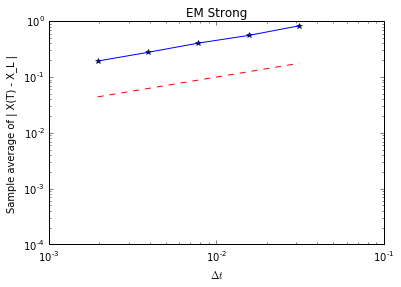

In [6]:
# test strong conververgence of Euler-Maruyama Method
# Solves dX = lambda*X dt + mu*X dW, X(0) = Xzero,
# where lambda = 2, mu = 1 and Xzer0 = 1.
#
# Discretized Brownian path over [0,1] has dt = 2^(-9).
# E-M uses 5different timesteps: 16dt, 8dt, 4dt, 2dt, dt.
# Examine strong convergence at T=1: E | X_L - X(T) |.

lambda_ = 2
mu = 1
Xzero = 1

T = 1
N = 2**9
dt = T/N
M = 1000
Xerr = np.zeros((M,5))
for s in range(M): 
    dW = np.sqrt(dt)*randn(N) # Brownian increments
    W = np.cumsum(dW) # discrete Brownian path
    Xtrue = Xzero*np.exp((lambda_ - 0.5*mu**2)+(mu*W[-1])) # true solution
    for p in range(5):
        R = 2**p
        Dt = R*dt
        L = int(N/R); # L Euler steps of size Dt = R*dt
        Xtemp = Xzero;
        
        for j in range(L):
            Winc = np.sum(dW[R*j:R*(j+1)]);
            Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc

        Xerr[s,p] = np.abs(Xtemp - Xtrue); # store the error att=1

Dtvals = dt*np.power(2,np.arange(5));
plt.loglog(Dtvals,np.mean(Xerr,axis=0),'b*-')# hold on
plt.loglog(Dtvals,(Dtvals**(0.5)),'r--')# hold off % reference slope of 1/2
plt.axis([1e-3,1e-1,1e-4,1])
plt.xlabel('$\Delta t$')
plt.ylabel('Sample average of | X(T) - X_L |')
plt.title('EM Strong')

# Least squares fit of error=C* Dt^q %%%%
A = np.concatenate( (np.ones((5,1)), np.log(Dtvals).reshape((5,1))), axis=1) 
rhs = np.log(np.mean(Xerr,axis=0)).reshape((5,1));
sol, reisd, rank,s = numpy.linalg.lstsq(A,rhs)
print(sol[1], reisd)

The Markov inequality says that if a random variable X has finite expected value, then for any $a \gt 0$ the probability that $|X| \ge a$ is bounded above by $(E|X|)/a$, that is

$$ \mathbb{P}(|X| \ge a) \le \frac{\mathbb{E}|X|}{a} $$

Then, taking $a=\Delta t^{1/4}$, the consequences of Euler-Maruyama method strong convergence of order $\gamma = \frac{1}{2}$ is:

$$ \mathbb{P}(|X_n-X(\tau)| \ge \Delta t^{1/4})\le C\Delta t^{1/4} $$

or

$$ \mathbb{P}(|X_n-X(\tau)| \lt \Delta t^{1/4})\ge 1-C\Delta t^{1/4} $$

This shows that the error at a fixed point in $[0,T]$ is small with probability cloase to 1.

The strong order of convergence measures the rate at which the "mean of decay" decays as $\Delta t \rightarrow 0$. A less demanding alternative is to measure decay of "error of means". This leads to the concept of weak order of convergence. A method is said to have weak order of convergence equal to $\gamma$ if there exist a constant C, such that for all functions p in some class:

$$|\mathbb{E}p(X_n)-\mathbb{E}p(X(\tau))| \lt C \Delta t ^{\gamma}$$

at any fixed $\tau = n\Delta t \in [0,T]$ and $\Delta t$ sufficiently small. Typically, function $p$ must satisfy smoothess and polynomial growth conditions. Further we will focus on the case where $p$ is identity function.


[ 0.98238265] [ 0.000487]


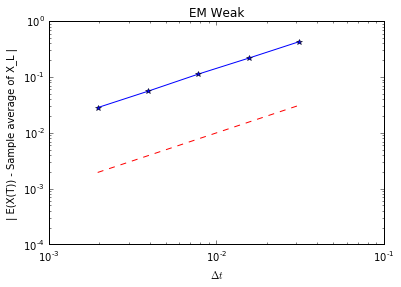

In [7]:
# EMWEAK Test weak convergence of Euler-Maruyama
#
# Solves dX = lambda*X dt + mu*X dW, X(0) = Xzero,
# where lambda = 2, mu = 1 and Xzer0 = 1.
#
# E-M uses 5different timesteps: 2^(p-10), p = 1,2,3,4,5.
# Examine weak convergence at T=1: | E (X_L) - E (X(T)) |.
#

lambda_ = 2
mu = 0.1
Xzero = 1
T = 1
M = 50000 # number of paths sampled
Xem = np.zeros((5,1))
for p in range(5): # take various Euler timesteps
    Dt = 2**(p+1-10)
    L = int(T/Dt) # L Euler steps of size Dt
    Xtemp = Xzero*np.ones((M,1));
    for j in range(L):
        #Winc = np.sqrt(Dt)*randn(M,1);
        Winc = np.sqrt(Dt)*np.sign(randn(M,1)); ## use for weak E-M ##
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc;
    Xem[p] = np.mean(Xtemp);
Xerr = np.abs(Xem - np.exp(lambda_));
Dtvals = np.power(2.0,(np.arange(1,6)-10));
plt.loglog(Dtvals,Xerr,'b*-')# hold on
plt.loglog(Dtvals,Dtvals,'r--')# hold off % reference slope of 1
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel('$\Delta t$')
plt.ylabel('| E(X(T)) - Sample average of X_L |')
plt.title('EM Weak')

#%%%% Least squares fit of error=C* dt^q %%%%
A = np.concatenate( (np.ones((5,1)), np.log(Dtvals).reshape((5,1))), axis=1) 
rhs = np.log(Xerr).reshape((5,1));
sol, reisd, rank,s = numpy.linalg.lstsq(A,rhs)
print(sol[1], reisd)

### Milstein's Higher Order Method

It is possible to raise strong order of convergence for Euler-Maryama method by adding a correction to stochastic increment, giving a Milstein method:

$$X_j = X_{j-1} + \Delta t f(X_{j-1}) + g(X_{j-1})(W(\tau_j)-W(\tau_{j-1})) + \frac{1}{2} g(X_{j-1})g'(X_{j-1})((W(\tau_j)-W(\tau_{j-1}))-\Delta t), j=1,2..., L $$

Milstein method arises from applying $It\hat{o}$ lemma.
Further let's evaluate milstein method by applying it to the following stochastic equation:

$$ dX(t)=tX(t)(K-X(t))dt + \beta X(t)dW(t), X(0)=X_0 $$

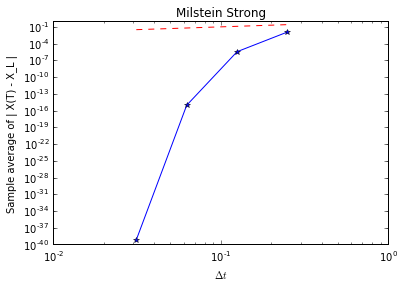

In [8]:
r=2
K=1
beta=0.25
Xzero=0.5
T=1.0
N=2**9
dt=T/N
M=500
R=np.array([1, 16, 32, 64, 128])

#t = np.arange(0.0,T, dt);
dW = np.sqrt(dt)*randn(M,N);
Xmil=np.zeros((M, len(R)))

for p in range(len(R)):
    L=int(N/R[p])
    Dt=R[p]*dt;
    Xtemp = Xzero * np.ones((M,1))
    for j in range(int(L)):
        Winc = np.sum(dW[:, R[p]*j:R[p]*(j+1)], axis=1).reshape((500,1));
        Xtemp = Dt*r*Xtemp*(K-Xtemp) + (beta*Xtemp*Winc) + (0.5*(beta**2.0)*Xtemp*((Winc**2.0) - Dt))
    Xmil[:,p]=Xtemp.reshape(M)

import numpy.matlib

Xref = Xmil[:,0];
Xerr = np.abs(Xmil[:,np.arange(1,len(R))] - numpy.matlib.repmat(Xref.reshape((M,1)),1,4));
Xerr_mean = np.mean(Xerr, axis=0)
Dtvals = dt*R[1:5]; 
plt.loglog(Dtvals,Xerr_mean, "b*-");
plt.loglog(Dtvals,Dtvals, "r--");
plt.title('Milstein Strong');
plt.xlabel('$\Delta t$');
plt.ylabel('Sample average of | X(T) - X_L |');
# Least squares fit of error=C* Dt^q 

#A = np.concatenate((np.ones((4,1)), np.log(Dtvals).reshape((4,1))), axis=1); 
#rhs = np.log(Xerr_mean).reshape((4,1));
#sol,resid, rank, s = numpy.linalg.lstsq(A,rhs)
#print(sol[1], resid)

### Linear Stability

What happens as $t \to \infty$? Can we define stability in similar way as it is defined in ODE case?

*Mean-square stability*
$$ \underset{x \to \infty}{\lim} \mathbb{E} {X(t)}^2 = 0 \Leftrightarrow	 \Re\{\lambda\} + \frac{1}{2}{|\mu|}^2 \lt 0 $$

*Asymptotic stability*
$$ \underset{x \to \infty}{\lim} |X(t)| = 0 (probability=1), \Leftrightarrow	\Re\{\lambda\ - \frac{1}{2} \mu^2 \} \lt 0 $$

Now suppose that the parameters $\lambda$ and $\mu$ are chosen that SDE is stable in mean-square and asymptotic sense. For what range of $\Delta t$ is the Euler-Maruyama method solution stable in analogous sense?

$$ \underset{x \to \infty}{\lim} \mathbb{E} {{X(t)}_j}^2 = 0 \Leftrightarrow | 1+ \Delta t \lambda |^2 + \Delta t |\mu|^2 \lt 1  $$

The asymptotic version:

$$ \underset{x \to \infty}{\lim} |X(t)| = 0 (probability=1), \Leftrightarrow \mathbb{E}log|1+\Delta t + \sqrt{\Delta t}\mu N(0,1)|  \lt 0$$


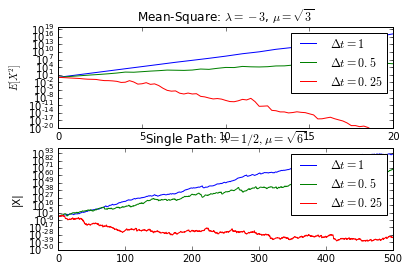

In [50]:
# Mean-square and asymptotic stability test for E-M
#
# SDE is dX = lambda*X dt + mu*X dW, X(0) = Xzero,
# where lambda and mu are constants and Xzero = 1.

T = 20
M = 50000
Xzero = 1;
############# Mean Square ################
plt.subplot(211)
lambda_ = -3
mu = np.sqrt(3) # problem parameters
for k in range(3):#1:3
    Dt = 2**(-k);
    N = int(T/Dt);
    Xms = np.zeros((N)); 
    Xtemp = Xzero*np.ones((M,1));
    for j in range(N): 
        Winc = np.sqrt(Dt)*randn(M,1);
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc;
        Xms[j] = np.mean(Xtemp**2); # mean-square estimate

    plt.semilogy(np.arange(0,T+Dt,Dt), np.concatenate((np.array([Xzero]),Xms)), label=("$\Delta t = {0}$".format(Dt)))
    #semilogy([0:Dt:T],[Xzero,Xms],ltype{k},’Linewidth’,2), hold on
    
plt.title('Mean-Square: $\lambda = -3$, $\mu = \sqrt{3} $')
plt.legend()
plt.ylabel('$E[X^2]$')
plt.axis([0,T,1e-20,1e+20])

######## Asymptotic: a single path ########
plt.subplot(212) 
T = 500;
lambda_ = 0.5
mu = np.sqrt(6); # problem parameters
for k in range(3):
    Dt = 2**(-k);
    N = int(T/Dt);
    Xemabs =np.zeros(N); 
    Xtemp = Xzero;
    for j in range(N):
        Winc = np.sqrt(Dt)*randn(1);
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc;
        Xemabs[j] = np.abs(Xtemp);

    plt.semilogy(np.arange(0,T+Dt,Dt), np.concatenate((np.array([Xzero]),Xemabs)),label=("$\Delta t = {0}$".format(Dt)))
plt.legend();
plt.title('Single Path: $\lambda = 1/2, \mu = \sqrt{6}$');
plt.ylabel('|X|');
plt.axis([0,T,1e-50,1e+100]);

### Stochastic Chain Rule or $It\hat{o}$ lemma

Suppose $X(t)$ satisfies $It\hat{o}$ differential equation:

$$dX(t)=\lambda dt + \mu dW(t)$$

Than let's take $V(X(t))$, a twice differentiable scalar function, then Taylor expansion would look like

$$ dV(X(t)) = \frac{dV}{dt}dt + \frac{dV}{dX}dX + \frac{1}{2!}( \frac{d^2V}{{dX}^2}{dX}^2 + \frac{d^2V}{{dt}^2}{dt}^2 )+ \frac{d^2V}{dXdt}{dXdt}) + ... $$

So, as $dt \to 0$, the terms ${dt}^2$ and $dtdW(t)$ tend to go to zero faster then ${dW}^2$, which is $O(dt)$, setting them to zero, expanding $dX$ and substituting ${dW}^2$ as $dt$:

$$ dV(X(t)) = \frac{dV}{dt}dt + \frac{dV}{dX}(\lambda dt + \mu dW(t)) + \frac{1}{2} \frac{d^2V}{{dX}^2}dt  $$

Which leads us to $It\hat{o}$ formula: 

$$ dV(X(t)) = (\frac{V(X(t))}{dt} + \lambda\frac{dV(X(t))}{dX}  + \frac{1}{2} \frac{d^2V(X(t))}{{dX}^2}) dt + \mu  \frac{dV(X(t))}{dX} dW(t)  $$


Let's verify this result numerically by taking the following SDE

$$ d X(t) = ( \alpha - X(t))dt + \beta \sqrt{X(t)} dW(t), X(0)=X_0 $

Where $\alpha$ and $\beta$ are positive numbers. This SDE models mean reverting square martingale process. Next take

$$V=\sqrt{X}$$

By applying $it\hat{o}$ lemma:

$$ d V(t) = (\frac{4 \alpha - {\beta}^2}{8V(t)} - \frac{1}{2}V(t))dt + \frac{1}{2} \beta dW(t) $$


0.00891860322304


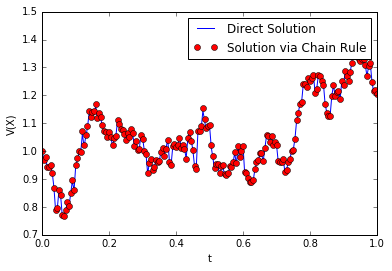

In [60]:
#CHAIN Test stochastic Chain Rule
#
# Solve SDE for V(X) = sqrt(X) where X solves
# dX = (alpha - X) dt + beta sqrt(X) dW, X(0) = Xzero,
# with alpha = 2, beta = 1 and Xzero = 1.
# Xem1 is Euler-Maruyama solution for X.
# Xem2 is Euler-Maruyama solution of SDE for V from Chain Rule.
# Hence, we compare sqrt(Xem1) and Xem2.
# Note: abs is used for safety inside sqrt, but has no effect in this case.

alpha = 2
beta = 1
T = 1
N = 200
dt = T/N; # Problem parameters
Xzero = 1
Xzero2 = 1/np.sqrt(Xzero); 
Dt = dt # EM steps of size Dt = dt
Xem1 = np.zeros(N)
Xem2 = np.zeros(N) 
Xtemp1 = Xzero; Xtemp2 = Xzero2;
for j in range(N):
    Winc = np.sqrt(dt)*randn();
    f1 = (alpha-Xtemp1);
    g1 = beta*np.sqrt(np.abs(Xtemp1));
    Xtemp1 = Xtemp1 + Dt*f1 + Winc*g1;
    Xem1[j] = Xtemp1;
    f2 = (4*alpha-beta**2)/(8*Xtemp2) - Xtemp2/2;
    g2 = beta/2;
    Xtemp2 = Xtemp2 + Dt*f2 + Winc*g2;
    Xem2[j] = Xtemp2;
plt.plot(np.arange(0,T+Dt,Dt),np.concatenate((np.sqrt(np.array([Xzero])),np.sqrt(np.abs(Xem1)))),'b-', label='Direct Solution')
plt.plot(np.arange(0,T+Dt,Dt),np.concatenate((np.array([Xzero]),Xem2)),'ro', label='Solution via Chain Rule')
plt.legend();
plt.xlabel('t');
plt.ylabel('V(X)');
Xdiff = numpy.linalg.norm(np.sqrt(Xem1) - Xem2,np.inf)
print(Xdiff)